# Use of zprocess RPC

The code below is to test zprocess to run a remote process.

- Open a terminal and run the remote server

```bash
python -m zprocess.remote -tui -p 7341
```

- Then run the cell below.

For instructions about how to run the server with shared secret consult the comments in [processclass_remote_example.py](https://github.com/chrisjbillington/zprocess/blob/master/zprocess/examples/processclass_remote_example.py)


This library must be available at the server side but it is not imported here:
           from my_package import TestProcess 
setting up the connection
Running and hello Test
hello
Sending ramp to remote process that should respond with a parabola.


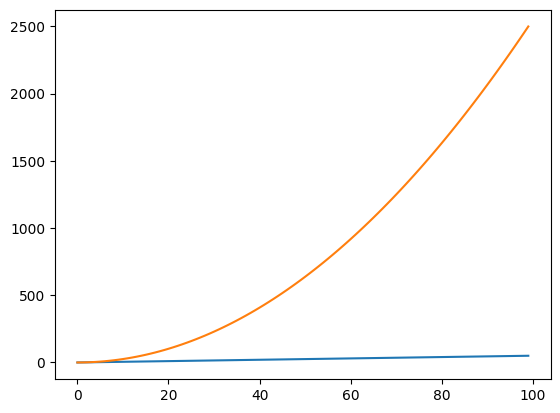

In [30]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

from zprocess.remote.server import RemoteProcessServer
from zprocess.remote import RemoteProcessClient, PROTOCOL_VERSION
from zprocess.process_tree import ProcessTree, Process

class Test():

    def __init__(self,run_server = False, port = None):
        self.run_server=run_server
        self.port = port
    
    def setUp(self):
        if self.run_server:
            # Run the server on a random port on localhost:
            self.server = RemoteProcessServer(bind_address='tcp://127.0.0.1', silent=True , port=self.port)
            self.port = self.server.port
        self.client = RemoteProcessClient(host='localhost', port=self.port) #self.port)
        self.process_tree = ProcessTree()
    
    def tearDown(self):
        if self.run_server:
            self.server.shutdown()
        self.server = None
        self.port = None
        self.client = None
        self.process_tree = None
    
    def test_hello(self):
        result = self.client.say_hello()
        print(result)
    
    def test_protocol(self):
        result = self.client.get_protocol()
        print(result)
    
    def test_basic_process(self):
        # Remote process created
        proc = Process(self.process_tree, remote_process_client=self.client,subclass_fullname='my_package.TestProcess')
        to_child, from_child = proc.start()
       
        # Data generation
        input_data = np.linspace(0,50,100)

        #Data exchange
        to_child.put(input_data)
        output_data = from_child.get()

        #Do something with data
        plt.plot(input_data)
        plt.plot(output_data)

        del proc


print("This library must be available at the server side but it is not imported here:")
print("           from my_package import TestProcess ")

test=Test(run_server = False, port=7341)

print("setting up the connection")
test.setUp()
print("Running and hello Test")
test.test_hello()
print("Collecting protocol version: ",end="")
test.test_protocol()
print("Sending ramp to remote process that should respond with a parabola.")
test.test_basic_process()
test.tearDown()